<a href="https://colab.research.google.com/github/B132020005/B132020005/blob/main/EX03_05_%E5%8F%B0%E7%81%A3%E8%82%A1%E7%A5%A8%E5%B8%82%E5%A0%B4%E5%80%8B%E8%82%A1%E6%AF%8F%E6%97%A5%E6%88%90%E4%BA%A4%E8%B3%87%E8%A8%8A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

--2025-04-29 06:34:15--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.132.138, 74.125.132.113, 74.125.132.101, ...
Connecting to drive.google.com (drive.google.com)|74.125.132.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2025-04-29 06:34:15--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.152.132, 2607:f8b0:4001:c56::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.152.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘taipei_sans_tc_beta.ttf’

taipei_sans_tc_beta 100%[===================>]  19.70M   106MB/s    in 0.2s    

2025-04-29 06:34:17 

In [14]:
import matplotlib
import matplotlib.pyplot as plt
# 新增字體
matplotlib.font_manager.fontManager.addfont('taipei_sans_tc_beta.ttf')
# 設定中文字型及負號正確顯示
plt.rcParams['font.sans-serif'] = 'Taipei Sans TC Beta'
plt.rcParams["axes.unicode_minus"] = False

In [15]:
import pandas as pd


def get_stock_data(data, stock_no):
  url = f'https://www.twse.com.tw/rwd/zh/afterTrading/STOCK_DAY?date={date}&stockNo={stock_no}&response=html'
  df = pd.read_html(url, header=1)[0]
  return df


'''
date_list = []
for i in range(3,16):
  year = 2024 + (i//12)
  mnth = i%12 + 1
  date_list.append(f'{year:04d}{mnth:02d}01')
'''


date_range = pd.date_range(start='20240401', end='20250401', freq='MS')
date_list = date_range.strftime('%Y%m%d').to_list()


df = pd.DataFrame()
for date in date_list:
  df = pd.concat([df, get_stock_data(date, '3533')], ignore_index=True)
df


,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,113/04/01,395549,559209620,1410.0,1435.0,1395.0,1415.0,15.0,701
1,113/04/02,1181627,1701217655,1415.0,1465.0,1405.0,1465.0,50.0,1483
2,113/04/03,1384532,2071881030,1450.0,1540.0,1440.0,1520.0,55.0,1887
3,113/04/08,1553852,2401903170,1525.0,1565.0,1525.0,1550.0,30.0,1883
4,113/04/09,1488162,2382580590,1560.0,1645.0,1555.0,1630.0,80.0,1965
...,...,...,...,...,...,...,...,...,...
255,114/04/23,1149894,1315572705,1135.0,1155.0,1120.0,1150.0,55.0,1834
256,114/04/24,1992697,2345378175,1160.0,1205.0,1145.0,1165.0,15.0,2457
257,114/04/25,2317369,2908356795,1220.0,1280.0,1220.0,1255.0,90.0,3367
258,114/04/28,1874114,2395384445,1265.0,1310.0,1255.0,1265.0,10.0,2479


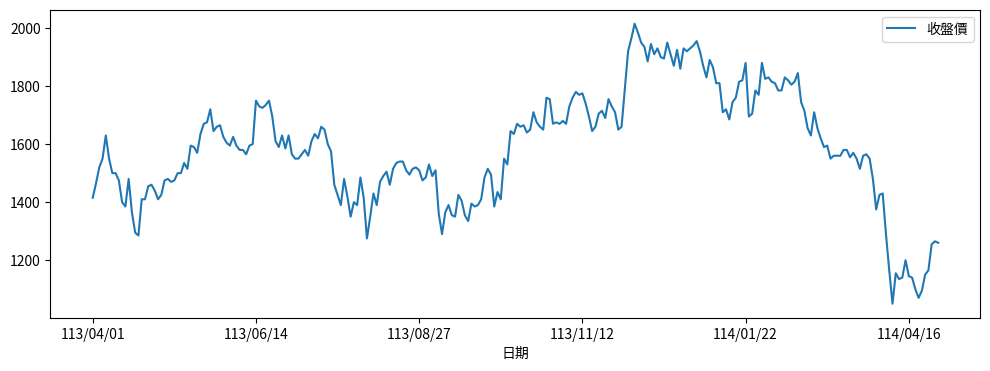

In [16]:
df.plot(kind='line',x='日期',y='收盤價',figsize=(12,4))
plt.show()


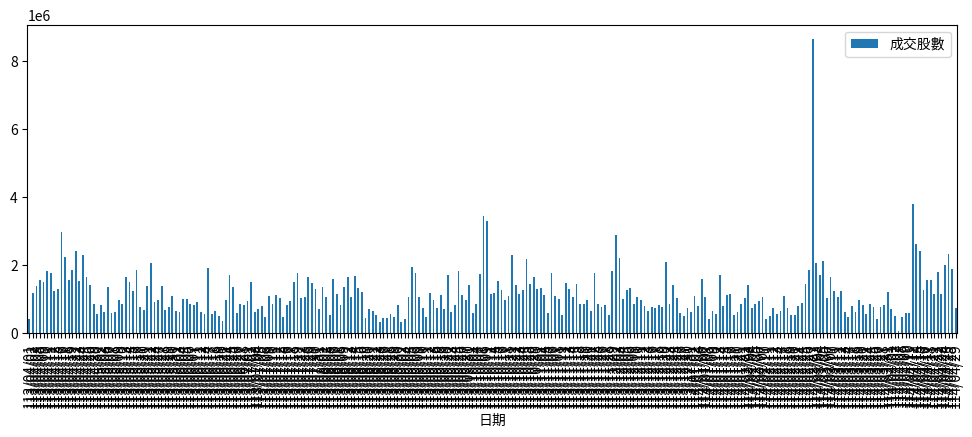

In [17]:
df.plot(kind='bar',x='日期',y='成交股數',figsize=(12,4))
plt.show()


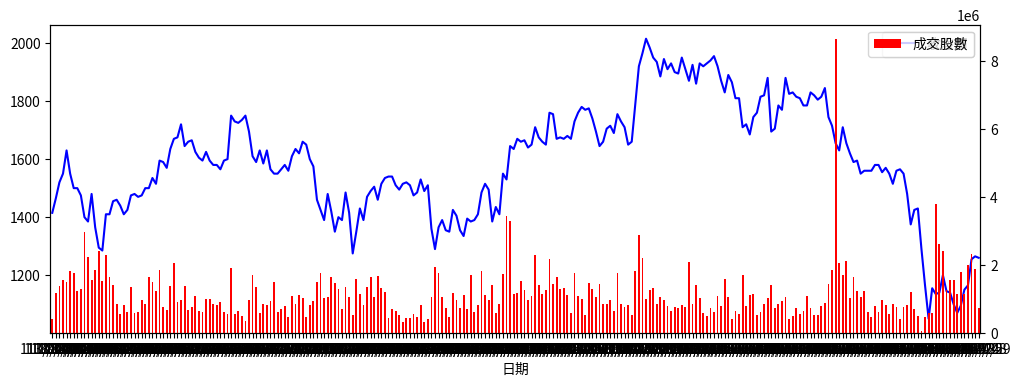

In [18]:
fig, ax1 = plt.subplots(figsize=(12,4))
df.plot(kind='line',x='日期',y='收盤價',ax=ax1,color= 'blue',label='收盤價')
ax2 = ax1.twinx()
df.plot(kind='bar',x='日期',y='成交股數',ax=ax2,color= 'red',label='成交股數')
plt.show()
